<a href="https://colab.research.google.com/github/nonecanseeus/2023--2/blob/main/1201%20audio_processing_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Processing
---

https://musiclab.chromeexperiments.com/Spectrogram/

### Fourier transform (분석용)
* spectrum은 주어진 signal에 대해 어떤 주파수 성분이 많이 있나?
* spectrogram은 spectrum을 time 축으로 concatenate한 것
* 방법: signal (inner product) a series of complex phasors with different frequencies
* signal은 벡터임. a series of = frequency 별로 하나하나 만든다는 것. (헤르츠 별로)
* inner product는 일종의 correlation (즉, 해당 frequency가 얼마나 있는지 probing = 나랑 비슷한 주파수가 얼마나 있는지 찔러보는 것. 숫자가 높으면 비슷한 것이 많다는 것)
* 왜? sine phasor 안 쓰나? phase sensitivity 때문 (0이 나오는 경우가 많아져 단점이 있음) \
* inner product하는 곡선들은 complex phasor임. 주어진 것이 complex phasor 값을 곱해 나오는 것이 복소수 -> absolute를 해서(절댓값) -> 길이가 스펙트로그램의 진하기 정도.



### Auto correlation
* measuring pitch / F0

### RMS: root mean square
* measuring intensity

In [ ]:
# 말하는 주파수에 준비한 주파수를 곱하여(둘 다 벡터임) 그 숫자가 높으면 스펙트럼에 진하게 나옴. 숫자가 작으면 높은 온도로 나오지 않음.
# 사인곡선은 두 개가 비슷하면 숫자가 높게 나오는데 phase에 민감해서 제대로 반응하지 못함. 사인곡선을 준비하는 대신 사인곡선의 불안정성 때문에 complex phasor를 쓴다고 보면 됨


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
# librosa = 설명제대로해달라고요 음향 관련된 것이 들어있으므로 라이브러리를 import 해옴

### load / plot / play sound file

In [ ]:
# from google.colab import files
# fn = files.upload()
import os
url = "https://raw.githubusercontent.com/hsnam95/class2023Fall/main/aeiou.wav"
# 깃헙 계정 이름을 쓰면 소리가 저장되고 이를 가져올 수 있음. "" 가능, '' 가능.
os.system("curl " + url + " > aeiou.wav")
# 이는 코랩 서버에서 이를 가져오라는 명령임. 가져와서 "" 이름으로 저장하라는 것. 따라하면 됨.-> 구글 코랩 계정에 저장됨(파일에)

s, sr = librosa.load('aeiou.wav')
# .load 함수를 쓰면 출력을 받아오는 건 아래에. sr도 받아옴.
# 만약 이걸 wave로 저장을 하면 s에는 많은 숫자가, sr에는 숫자 하나가 저장됨.

In [ ]:
s
len(s)

48600

In [ ]:
sr

22050

In [ ]:
# 몇 초짜리 wave인가? 시험문제
# 48600/22050 -> 2초 조금 넘게 나옴. 이런 식으로 추정할 수 있음.

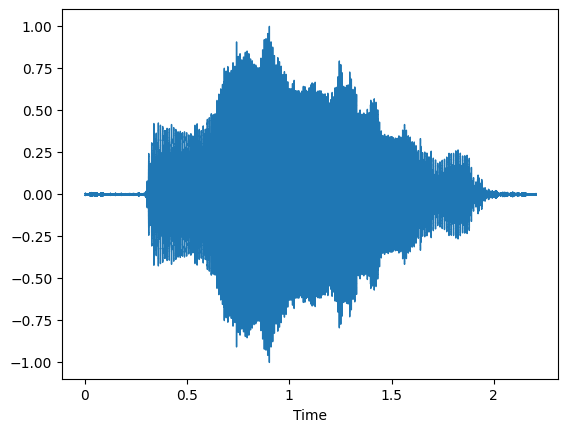

In [ ]:
librosa.display.waveshow(s, sr=sr)
# 이렇게 하면 plot이 됨.

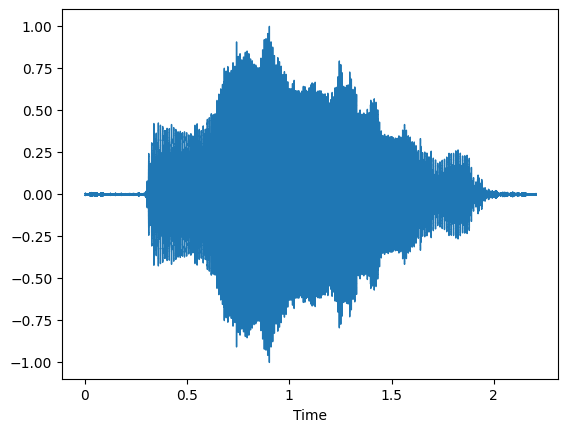

In [ ]:
s = librosa.util.normalize(s)
# normalize한다는 것은 진폭을 1로 고정시켜준다는 것.
librosa.display.waveshow(s, sr=sr)
ipd.Audio(s[7000:12000], rate=sr)
# [7000:12000] = 7001번째부터 12001번째까지 아. 라는 소리임. 이걸 없애면 아에이오우 전부 길게 소리 나옴.

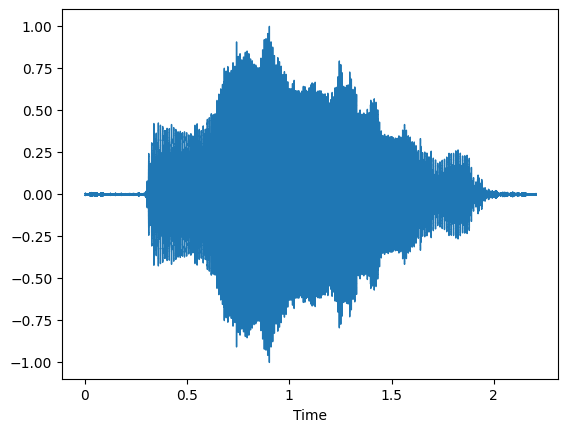

In [ ]:
s = librosa.util.normalize(s)
librosa.display.waveshow(s, sr=sr)
ipd.Audio(s, rate=sr)
# 이게 전체 파일.

### Fourier Transform for Spectrogram

In [ ]:
# 조금의 구간만 골라서 분석해야 함. 구간을 고른 후 그 구간의 길이만큼의 complex phase를 주파수마다 준비. Hz가 높아질수록 벡터의 길이는 똑같아도
# 스프링 개수가 많아짐.
# 분석용으로는 shift에 민감하기 때문에 sine phasor가 아니라 complex phasor 써야 함.

(0.0, 5000.0)

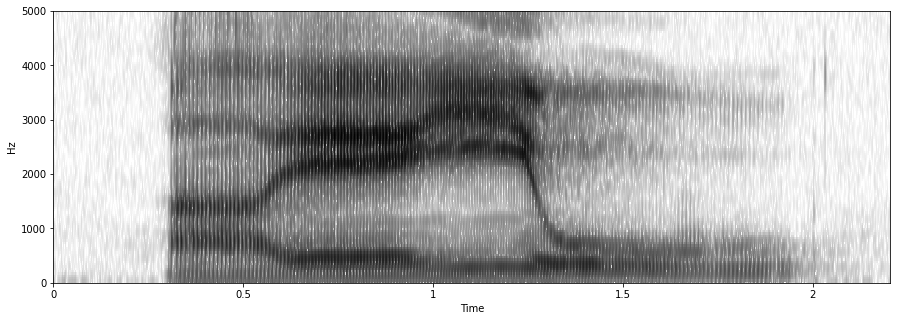

In [ ]:
# 아에이오우를 스펙트로그램으로 만드는 방법.
s_preemp = librosa.effects.preemphasis(s)

n_fft=512
hop_length=int(0.001*sr)
win_length=int(sr*0.008)
# 구간을 아주 작게. hop는 더 짧음. 1ms만큼을 움직이는 것. (1/1000)


#.stft가 해줌. 개념만 알면 되고 그냥 따라가면 됨.
spec = librosa.stft(s_preemp, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window = 'hann')
# n_fft = 준비하는 곡선의 개수를 몇 개 할 건가 - 커지면 아주 촘촘하게 한다는 것. 개수가 작으면 듬성듬성... 한 세로줄마다 들어가는 숫자 개수가 작겠지
# win_length - window의 length 분석하고자 하는 구간의 길이 hop_length : 얼만큼 움직일 것인가
#여기까지가 절댓값 치기 전으 ㅣ값들이 있는 것.
magspec = np.abs(spec)
# abs하면 절댓값을 치게 됨. -> 복소수를 어떤 값으로 바꿔줌.
dBspec = librosa.amplitude_to_db(magspec, ref=np.max)

plt.figure(figsize=(15, 5))
librosa.display.specshow(dBspec, sr=sr, x_coords = np.linspace(1, len(s), dBspec.shape[1])/sr , x_axis='time', y_axis='linear', cmap='Greys')
plt.ylim((0,5000))
# 5000Hz까지만 분석하고 싶다는 것. 5000Hz까지만 준비해놓은 곡선에 곱함. 그러면 결과로 A+bi가 분비한 곡선의 개수만큼 나올 것이고, 그 값에 절댓값을 침.
# 절댓값 = 원점부터 그 점까지의 길이. 절댓값을 치면 실수값 하나가 나옴.
#계속끝이라면서존나계쏙하는건뭔데요
# 엄청나게 많은 숫자가 스펙트로그램을 뒤덮고 있다는 것을 알아야 함.

# window 설정 -> complex랑 inner wave하고 절댓값 취하면 저 그림이 나옴. 어떤 주파수 별로 phasor을 몇 개 설정해야 하는가.
# 여러 개의 complex phasor 준비. 각각의 phasor을 주어진 시그널과 곱하고 나온 값을 뿌려주면 된다. 그리고 shift - 분석 - shift - 분석...

### RMS(Root Mean Square) for intensity

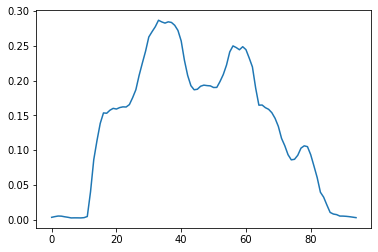

In [ ]:
rms = librosa.feature.rms(y=s)
# ms - spaure 제곱, mean 평균 -> root 루트를 씌움 -> 모든 것을 양수화시키기 위함임(원래 음수 양수가 섞여 평균이 0이 되어서). 절댓값의 평균과 비슷하나 rms가 훨씬 보편화된 방식
# -> 진폭을 구하기 위함임. -부분을 없애서 순수한 진폭을 보기 위함.(목적) 신호의 진폭을 이야기해준다.
# librosa.feature.rms 함수를 쓰면 그냥 해줌.
plt.plot(rms[0])
# 그 값을 plot를 하면 표로 보여줌.

### Autocorrelation for pitch(F0) measurement

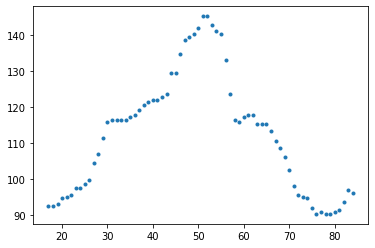

In [ ]:
# pitch: 음의 높낮이. 아에이오우의 높낮이가 다 다름. 이를 수치적으로 보여줌.
F0, voiced_flag, voiced_prob = librosa.pyin(s, fmin=60, fmax=200)
plt.plot(F0, '.')
# autocorrelation: 자기자신과 correlation하는 것 -> 값이 항상 1이 나옴. 여기서 살짝 슬라이드하면 correlation값은 1보다 살짝 낮아지게 됨.
# 기본적으로 correlation은 똑같은 길이의 벡터(숫자의 개수)를 비교할 때 쓰는 것임. 한 방향으로 같이 가는가? 가 correlation
# ex. 키가 크면 몸무게가 높다... 등. 이게 첫 번째 가정이고
# 이 경우는 자기 신호와 자기 신호 비교 = autocorrelation.
# 똑같이 window 치고 살짝 shift한 것과 하면 점점 correlation 떨어지다가 다시 올라옴.
# 점점 1보다 낮아지다가 어느 순간 correlation값이 1에 가까워지게 되다가 다시 1이 될 것.(한 사이클을 완전히 지나면)
# periodicity(반복된다는 것)을 이용하는 것임. 자기자신과 살짝 shift한 것을 correlation하여 새로 다시 1까지 올라가는 그 점은
# 그 구간만큼 반복되는구나라는 정보를 줌. 이를 직접 측정할 수도 잇지만... 두 번째 peak가 오는 그 길이를 자동으로 알게 해줌. 그 구간의 길이 = 그 시간만큼 성대가 한 번 떤다.
# -> 피치 값을 계산할 수 있음. 만약 0,01초였다면 1초동안 100Hz.

# wave form이 있으면 피치도 스펙트럼도 다 알고리즘으로 만들어내는 것을 배운 것이다

# inner product 중요
# 사인 곡선 - amp, frequency 등.. 완전히 똑같은 구간해서 inner product - 당연히 1이 나올 것
# 그러나 90도 지나서 하면 correlation값이 0이 되기 때문에 사인 곡선을 쓰지 않고 complex phasor 쓴다.